Digital audio basics
Audio representation in computers

In [1]:
# import libraries for manipulating arrays and plotting graphs
import numpy as np
import matplotlib.pyplot as plt

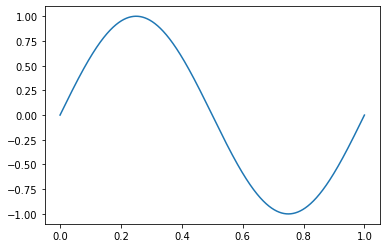

In [7]:
# initialise 'time' array
t = np.arange(44100)/44100
# make a sinusoidal
s = np.sin( 2*np.pi*t )
# plot it
plt.plot( t, s )

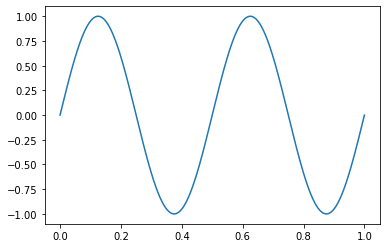

In [8]:
# change frequency, e.g. 2
# set frequency
f = 2
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# and plot it
plt.plot( t, s )

In [23]:
# let's listen to some audio
import sounddevice as sd
# set frequency
f = 440
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# and play it
sd.play( s , 44100 )

In [18]:
# we can also make a wav file out of it
import scipy.io.wavfile as wf
wf.write('test1.wav', 44100, s)
# todo: write in a folder to keep things clean
# also: open saved wav file in Audacity to check it out - both in time and frequency domains

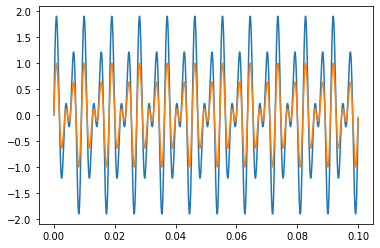

In [30]:
# add harmonics
f1 = 220
f2 = (3/2)*220
s1 = np.sin( 2*np.pi*f1*t )
s2 = np.sin( 2*np.pi*f2*t )
# plot them as they would sound together, i.e., plot sum
s = s1 + s2
# for clarity, plot the first 1/10 of a second
plt.plot( t[:4410] , s[:4410] )
# normalise to avoid excessive range
s /= np.max( np.abs(s) )
plt.plot( t[:4410] , s[:4410] )
sd.play( s , 44100 )

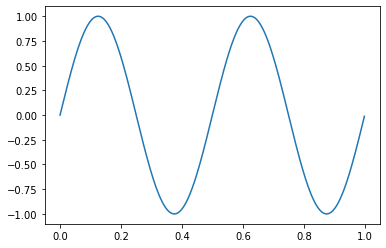

In [50]:
# Sampling rate - aliasing - sampling (Nyquist) theorem
# assume a sample rate of 1000, i.e. sampling 1000 times per second
sr = 1000
# construct a 1-sec time array that corresponds to this sample rate
t = np.arange(sr)/sr # question: how can we represent 2 seconds of audio? 2.3 secs?
# let's construct an audio array of one second with frequency 2
f = 2
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )

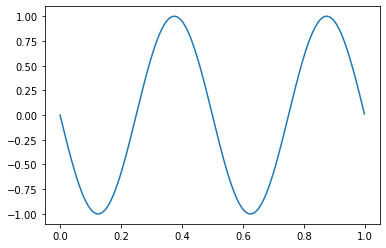

In [51]:
# now let's construct an audio array of one second with frequency 998
f = 998
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )
# what's going on?

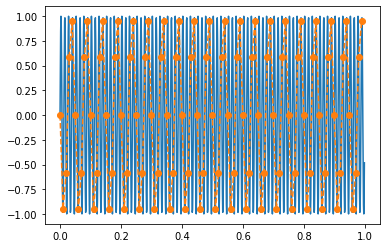

In [65]:
# assume an the approximation of an analog signal, using higher sample rate
analog_sr = 1000
# assume 1 second of an 'analog' recording
analog_t = np.arange( analog_sr )/analog_sr
# with frequency 50
f_real = 80
analog_s = np.sin( 2*np.pi*f_real*analog_t )
# plot it
plt.plot( analog_t , analog_s )
# assume that we are sampling at 100
digital_sr = 100
digital_t = np.arange( digital_sr )/digital_sr
# from analog_s, sample
digital_idxs = np.floor( digital_t*analog_sr ).astype(int)
digital_s = analog_s[ digital_idxs ]
plt.plot( digital_t , digital_s, 'o--' )
plt.savefig('aliasing.png', dpi=300)